# Objective

The objective of this notebook is to transfer and edit all functions of `spy_stock_eda.ipynb` and build into `arima_tools.py` file. This notebook is for testing and building.

In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../')
import src.tda_api_tools as tda
from src.arima_tools import arima_tools
from statsmodels.tsa.stattools import acf, pacf

import matplotlib.pyplot as plt

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.simplefilter('ignore', category=UserWarning)


## Test Data

In [2]:
# Get daily closing price of SPY
symbol = "SPY"
file_path = "../data/{}_daily01.csv".format(symbol)
data_df = pd.read_csv(file_path, index_col="datetime")
data_df.index = pd.DatetimeIndex(data_df.index)
data_df.head()

,open,high,low,close,volume
datetime,,,,,
2015-10-14 01:00:00,200.18,200.87,198.9400,199.29,99106161
2015-10-15 01:00:00,200.08,202.36,199.6400,202.35,134142195
2015-10-16 01:00:00,202.83,203.29,201.9200,203.27,114580052
2015-10-19 01:00:00,202.50,203.37,202.1300,203.37,76523897
2015-10-20 01:00:00,202.85,203.84,202.5471,203.09,78448484


## Data Manipulation


In [3]:
atl = arima_tools()

In [4]:
atl.moving_averages(data_df, [10, 100], "close")

,close,MA(10),MA(100)
datetime,,,
2016-03-08 01:00:00,198.40,197.36942,200.046192
2016-03-09 01:00:00,199.38,197.98742,200.047092
2016-03-10 01:00:00,199.54,198.38742,200.018992
2016-03-11 01:00:00,202.76,199.15450,200.013892
2016-03-14 01:00:00,202.50,200.04850,200.005192
...,...,...,...
2020-12-24 01:00:00,369.00,368.38100,347.275400
2020-12-28 01:00:00,372.17,368.96800,347.676000
2020-12-29 01:00:00,371.46,369.64800,348.047300


In [5]:
atl.differences(data_df)

,open,high,low,close,volume,open_lag_1,high_lag_1,low_lag_1,close_lag_1,volume_lag_1
datetime,,,,,,,,,,
2015-10-14 01:00:00,200.18,200.87,198.9400,199.29,99106161,NaN,NaN,NaN,NaN,NaN
2015-10-15 01:00:00,200.08,202.36,199.6400,202.35,134142195,-0.10,1.49,0.7000,3.06,35036034.0
2015-10-16 01:00:00,202.83,203.29,201.9200,203.27,114580052,2.75,0.93,2.2800,0.92,-19562143.0
2015-10-19 01:00:00,202.50,203.37,202.1300,203.37,76523897,-0.33,0.08,0.2100,0.10,-38056155.0
2015-10-20 01:00:00,202.85,203.84,202.5471,203.09,78448484,0.35,0.47,0.4171,-0.28,1924587.0
...,...,...,...,...,...,...,...,...,...,...
2020-12-24 01:00:00,368.08,369.03,367.4500,369.00,26457853,-0.20,-0.59,0.2328,1.43,-19743549.0
2020-12-28 01:00:00,371.74,372.59,371.0700,372.17,39000402,3.66,3.56,3.6200,3.17,12542549.0
2020-12-29 01:00:00,373.81,374.00,370.8300,371.46,53680451,2.07,1.41,-0.2400,-0.71,14680049.0


## Stationarity with ADF and Integration Order Determination

In [6]:
atl.adf_test(data_df.close)

series name                       close
Test Statistic                -0.607381
p-value                        0.869305
#Lags Used                            9
Number of Observations Used        1304
reject null hypothesis            False
Critical Value (1%)            -3.43537
Critical Value (5%)            -2.86376
Critical Value (10%)           -2.56795
dtype: object

In [7]:
atl.find_lag_stationary(data_df.close)

1

## PACF and AR Order Determination

In [8]:
atl.pacf_order(data_df)

{'close': 2}

## Make Time Series Train-Test-Split

In [9]:
def ts_tts(data, ntrain=230, ntest=20, nholdout=5):
    return data[-ntrain:-ntest], data[-ntest:-nholdout], data[-nholdout:]

In [10]:
atl.ts_tts(data_df)

(                       open      high      low   close    volume
 datetime                                                        
 2020-02-05 01:00:00  332.27  333.0900  330.670  332.86  65951146
 2020-02-06 01:00:00  333.91  334.1900  332.800  333.98  50359688
 2020-02-07 01:00:00  332.82  333.9941  331.600  332.20  64139443
 2020-02-10 01:00:00  331.23  334.7500  331.190  334.68  42070006
 2020-02-11 01:00:00  336.16  337.0200  334.684  335.26  54864533
 ...                     ...       ...      ...     ...       ...
 2020-11-25 01:00:00  363.13  363.1600  361.480  362.66  45330890
 2020-11-27 01:00:00  363.84  364.1800  362.580  363.67  28514072
 2020-11-30 01:00:00  362.83  363.1200  359.170  362.06  83872709
 2020-12-01 01:00:00  365.57  367.6800  364.930  366.02  74504969
 2020-12-02 01:00:00  364.82  366.9600  364.200  366.79  45927000
 
 [210 rows x 5 columns],
                        open      high       low   close     volume
 datetime                                      

## Monthly breakdown per year grid plot

In [11]:
plot_data = atl.moving_averages(data_df, [10, 100], "close")
plot_data.head()

,close,MA(10),MA(100)
datetime,,,
2016-03-08 01:00:00,198.40,197.36942,200.046192
2016-03-09 01:00:00,199.38,197.98742,200.047092
2016-03-10 01:00:00,199.54,198.38742,200.018992
2016-03-11 01:00:00,202.76,199.15450,200.013892
2016-03-14 01:00:00,202.50,200.04850,200.005192


In [12]:
test_plot = plot_data[plot_data.index > "2020-01-01"]

(<Figure size 1296x1296 with 12 Axes>,
 array([[<AxesSubplot:title={'center':'2020-01 Prices'}>,
         <AxesSubplot:title={'center':'2020-02 Prices'}>,
         <AxesSubplot:title={'center':'2020-03 Prices'}>],
        [<AxesSubplot:title={'center':'2020-04 Prices'}>,
         <AxesSubplot:title={'center':'2020-05 Prices'}>,
         <AxesSubplot:title={'center':'2020-06 Prices'}>],
        [<AxesSubplot:title={'center':'2020-07 Prices'}>,
         <AxesSubplot:title={'center':'2020-08 Prices'}>,
         <AxesSubplot:title={'center':'2020-09 Prices'}>],
        [<AxesSubplot:title={'center':'2020-10 Prices'}>,
         <AxesSubplot:title={'center':'2020-11 Prices'}>,
         <AxesSubplot:title={'center':'2020-12 Prices'}>]], dtype=object))

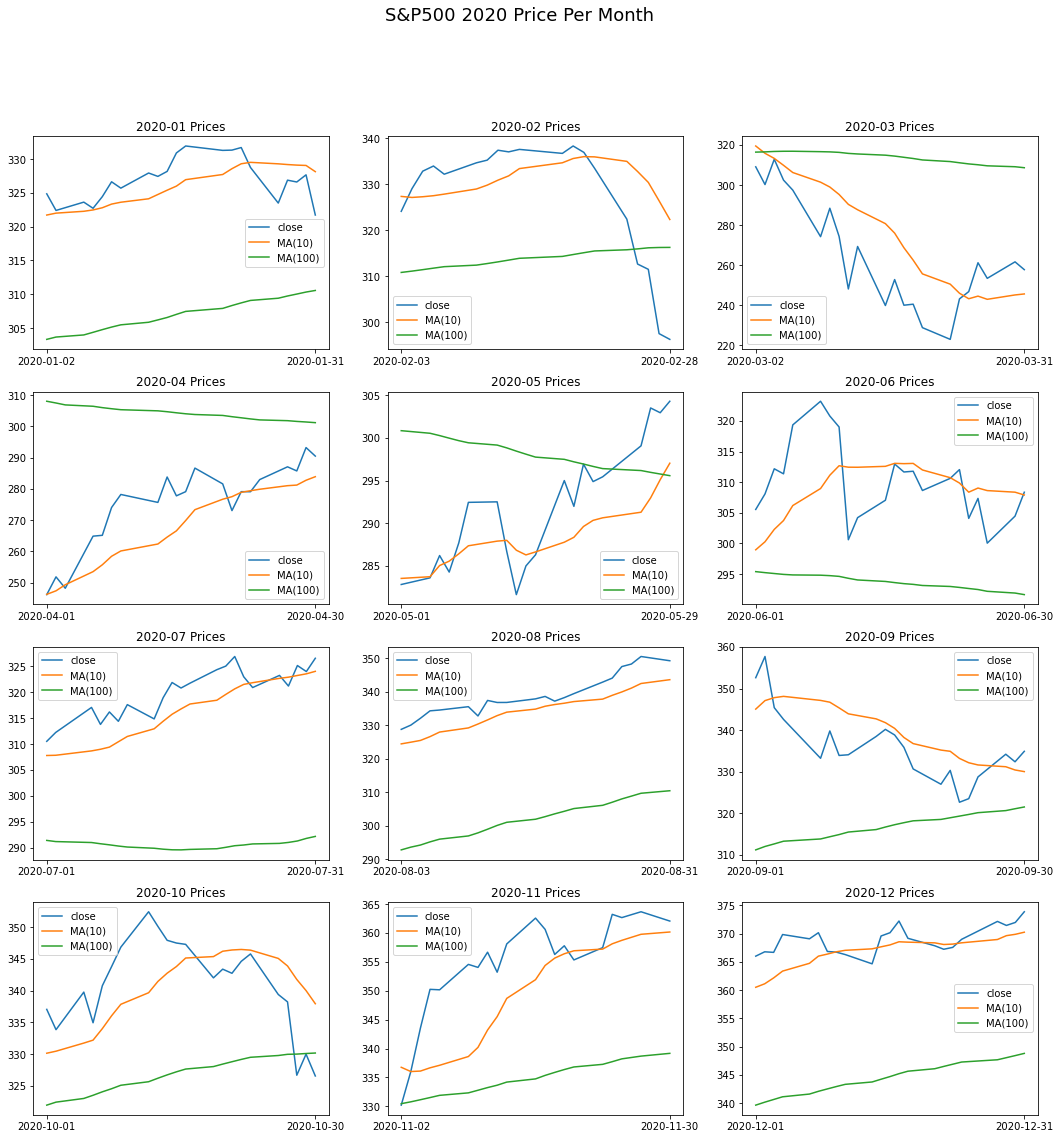

In [13]:
atl.month_breakdown_grid(test_plot, "S&P500")

In [51]:
test_plot.index[0].year

2020

In [57]:
from datetime import datetime

In [18]:
def month_breakdown_grid(input_df, name, n_rows=4, n_cols=3,):
        total = n_rows * n_cols
        year = input_df.index[0].year
    
        fig, ax = plt.subplots(n_rows, n_cols, figsize = (18, 18))
    
        for i in range(total): #for loop to iterate viz
            # ========= format visualization position =====
            startmonth,  endmonth = i+1, i+2
            rows, cols = i//n_cols, i%n_cols
    
            # ================= format date ===============
            if startmonth < 10:
                startmonth = "".join(["0", str(startmonth)])
            else:
                startmonth = str(startmonth)
    
            if endmonth < 10:
                endmonth = "".join(["0", str(endmonth)])
            else:
                endmonth = str(endmonth)
    
            start = "-".join([str(year), startmonth, "01"])
            end = "-".join([str(year), endmonth, "01"])
    
            # ============== parse data =================
            if i < 11:
                current_plot_df = input_df[(input_df.index > start) & (input_df.index < end)]
            else:
                current_plot_df = input_df[input_df.index > start]
            
            print(i)
            print(current_plot_df)
    
            # ============== plotting =================
            for col in current_plot_df.columns:
                # graph items
                xticks = [current_plot_df.index[0], current_plot_df.index[-1]]
                xlabels = [str(date)[:10] for date in xticks]
                axtitle = "{} Prices".format(xlabels[0][:7])
    
                # plot
                ax[rows][cols].plot(current_plot_df[col], label=col)
    
                # more concise x axis
                ax[rows][cols].set_xticks(xticks)
                ax[rows][cols].set_xticklabels(xlabels)
                # add ax title
                ax[rows][cols].set_title(axtitle)
                ax[rows][cols].legend()
    
            fig.suptitle(f"{name} {year} Price Per Month", size=18, y=0.92)
            
        return fig, ax

In [19]:
test_plot

,close,MA(10),MA(100)
datetime,,,
2020-01-02 01:00:00,324.87,321.728,303.3260
2020-01-03 01:00:00,322.41,322.010,303.6694
2020-01-06 01:00:00,323.64,322.284,303.9803
2020-01-07 01:00:00,322.73,322.484,304.3686
2020-01-08 01:00:00,324.45,322.807,304.7666
...,...,...,...
2020-12-24 01:00:00,369.00,368.381,347.2754
2020-12-28 01:00:00,372.17,368.968,347.6760
2020-12-29 01:00:00,371.46,369.648,348.0473


0
                      close   MA(10)   MA(100)
datetime                                      
2020-01-02 01:00:00  324.87  321.728  303.3260
2020-01-03 01:00:00  322.41  322.010  303.6694
2020-01-06 01:00:00  323.64  322.284  303.9803
2020-01-07 01:00:00  322.73  322.484  304.3686
2020-01-08 01:00:00  324.45  322.807  304.7666
2020-01-09 01:00:00  326.65  323.349  305.1446
2020-01-10 01:00:00  325.71  323.626  305.4784
2020-01-13 01:00:00  327.95  324.135  305.8570
2020-01-14 01:00:00  327.45  324.772  306.2070
2020-01-15 01:00:00  328.19  325.405  306.5653
2020-01-16 01:00:00  330.92  326.010  307.0260
2020-01-17 01:00:00  331.95  326.964  307.4655
2020-01-21 01:00:00  331.30  327.730  307.9098
2020-01-22 01:00:00  331.34  328.591  308.3343
2020-01-23 01:00:00  331.72  329.318  308.7257
2020-01-24 01:00:00  328.77  329.530  309.0889
2020-01-27 01:00:00  323.50  329.309  309.4165
2020-01-28 01:00:00  326.89  329.203  309.7450
2020-01-29 01:00:00  326.62  329.120  310.0330
2020-01-30 

(<Figure size 1296x1296 with 12 Axes>,
 array([[<AxesSubplot:title={'center':'2020-01 Prices'}>,
         <AxesSubplot:title={'center':'2020-02 Prices'}>,
         <AxesSubplot:title={'center':'2020-03 Prices'}>],
        [<AxesSubplot:title={'center':'2020-04 Prices'}>,
         <AxesSubplot:title={'center':'2020-05 Prices'}>,
         <AxesSubplot:title={'center':'2020-06 Prices'}>],
        [<AxesSubplot:title={'center':'2020-07 Prices'}>,
         <AxesSubplot:title={'center':'2020-08 Prices'}>,
         <AxesSubplot:title={'center':'2020-09 Prices'}>],
        [<AxesSubplot:title={'center':'2020-10 Prices'}>,
         <AxesSubplot:title={'center':'2020-11 Prices'}>,
         <AxesSubplot:title={'center':'2020-12 Prices'}>]], dtype=object))

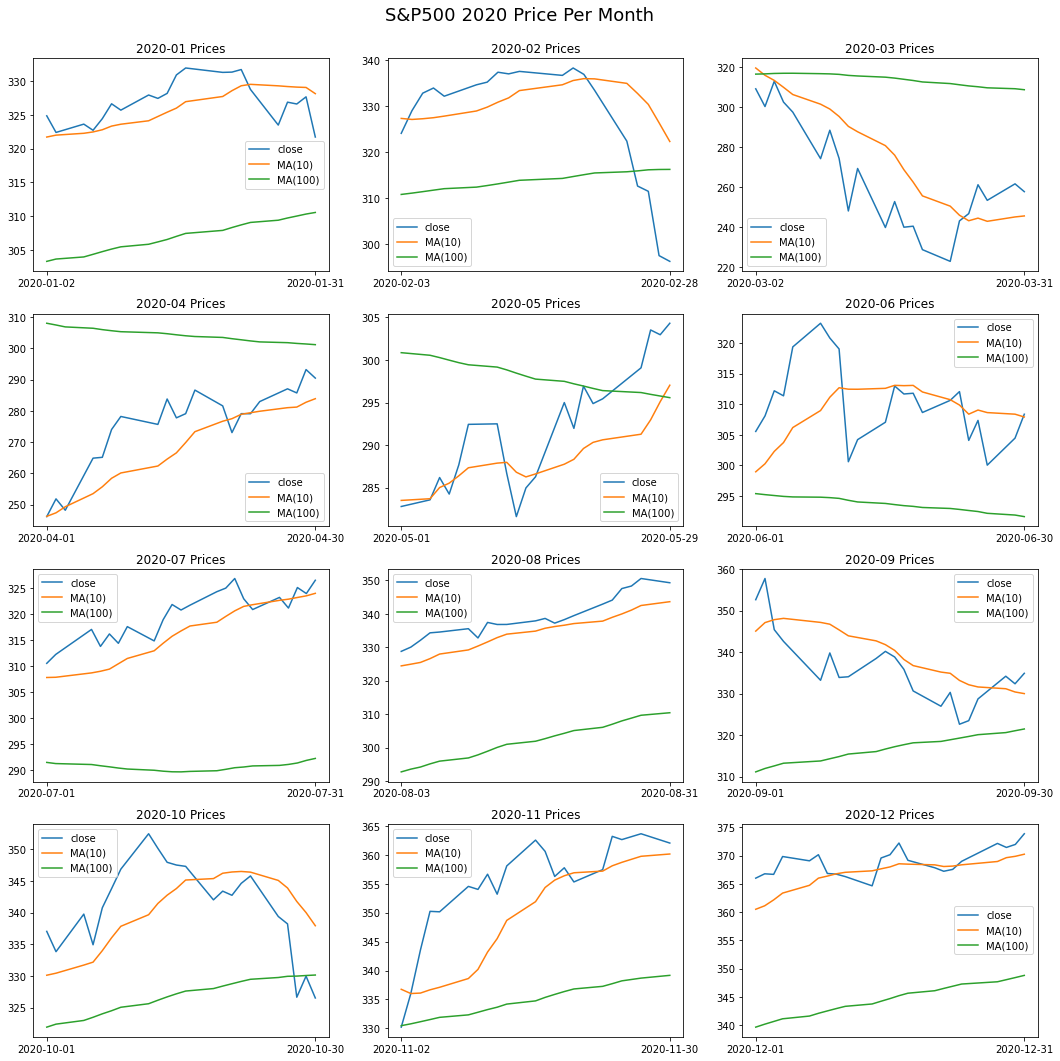

In [20]:
month_breakdown_grid(test_plot, "S&P500")

In [17]:
n_rows = 4
n_cols = 3
total = m_rows * n_cols
year = test_plot.index[0].year

fig, ax = plt.subplots(n_rows, n_cols, figsize = (18, 18))

for i in range(total): #for loop to iterate viz
    # ========= format visualization position =====
    startmonth,  endmonth = i+1, i+2
    rows, cols = i//n_cols, i%n_cols
    
    # ================= format date ===============
    if startmonth < 10:
        startmonth = "".join(["0", str(startmonth)])
    else:
        startmonth = str(startmonth)
        
    if endmonth < 10:
        endmonth = "".join(["0", str(endmonth)])
    else:
        endmonth = str(endmonth)
    
    start = "-".join([str(year), startmonth, "01"])
    end = "-".join([str(year), endmonth, "01"])
    
    # ============== parse data =================
    if i < 11:
        current_plot_df = test_plot[(test_plot.index > start) & (test_plot.index < end)]
    else:
        current_plot_df = test_plot[test_plot.index > start]
    
    # ============== plotting =================
    for col in current_plot_df.columns:
        # graph items
        xticks = [current_plot_df.index[0], current_plot_df.index[-1]]
        xlabels = [str(date)[:10] for date in xticks]
        axtitle = "{} Prices".format(xlabels[0][:7])
        
        # plot
        ax[rows][cols].plot(current_plot_df[col], label=col)
        
        # more concise x axis
        ax[rows][cols].set_xticks(xticks)
        ax[rows][cols].set_xticklabels(xlabels)
        # add ax title
        ax[rows][cols].set_title(axtitle)
        ax[rows][cols].legend()
    
    fig.suptitle(f"{year} Price Per Month", size=18)

NameError: name 'm_rows' is not defined

In [78]:
test_plot[(test_plot.index > "2020-03-01") & (test_plot.index < start)]

,close,MA(10),MA(100)
datetime,,,
2020-03-02 01:00:00,309.09,319.493,316.4331
2020-03-03 01:00:00,300.24,315.844,316.5502
2020-03-04 01:00:00,312.86,313.296,316.7661
2020-03-05 01:00:00,302.46,309.847,316.8583
2020-03-06 01:00:00,297.46,306.245,316.8701
...,...,...,...
2020-11-23 01:00:00,357.46,357.206,337.2590
2020-11-24 01:00:00,363.22,358.124,337.7207
2020-11-25 01:00:00,362.66,358.723,338.2095


In [46]:
for i in range(12):
    print(i//3, i%3)

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2
3 0
3 1
3 2
